# Clasificación multiclase

# Librerías

In [1]:
from tensorflow.keras.datasets import reuters

# Dataset

*   46 clases
*   8982 muestras de entrenamiento
*   2246 muestras de test
*   Es posible especificar la cantidad de palabras frecuentes que utilizan al leer el dataset (ej. 1000)
*   Contiene noticias de la agencia Reuters en 1986
*   Cada muestra tiene valores (indices) que corresponden a las palabras





In [2]:
# Utilizar las diez mil palabras más frecuentes

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [5]:
# Decodificar

word_index = reuters.get_word_index()
inverted_word_index = dict([(i, word) for (word, i) in word_index.items()])
decoded_sequence = " ".join([inverted_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_sequence

# Indices are offset by 3, because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
# Vectorizar los datos

# La secuencia original de los datos contiene el índice de las palabras del
# texto, con un vocabulario hasta de 10 mil palabras
# Al convertirlo en one hot, la posición de las palabras que sí estén en la
# secuencia, se dejan como 1, de resto estarán en 0

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[100]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
# Etiquetas one hot
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras. layers import Flatten, Conv2D, Dense, MaxPooling2D

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Modelo

*   No. de capas
*   Neuronas por capa






In [19]:
model = Sequential([
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dense(46, activation="softmax")
])

In [20]:
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",
metrics=["accuracy"])

# Validation Set

In [21]:
# 80 /20

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# Entrenamiento

In [22]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 91ms/step - loss: 2.6301 - accuracy: 0.5099 - val_loss: 1.7250 - val_accuracy: 0.6220
Epoch 2/9
16/16 [==============================] - 1s 57ms/step - loss: 1.4714 - accuracy: 0.6839 - val_loss: 1.3232 - val_accuracy: 0.7010
Epoch 3/9
16/16 [==============================] - 1s 53ms/step - loss: 1.1333 - accuracy: 0.7501 - val_loss: 1.1755 - val_accuracy: 0.7360
Epoch 4/9
16/16 [==============================] - 1s 56ms/step - loss: 0.9185 - accuracy: 0.7997 - val_loss: 1.0512 - val_accuracy: 0.7700
Epoch 5/9
16/16 [==============================] - 1s 53ms/step - loss: 0.7560 - accuracy: 0.8359 - val_loss: 0.9795 - val_accuracy: 0.7840
Epoch 6/9
16/16 [==============================] - 1s 55ms/step - loss: 0.6212 - accuracy: 0.8636 - val_loss: 0.9503 - val_accuracy: 0.8000
Epoch 7/9
16/16 [==============================] - 1s 55ms/step - loss: 0.5079 - accuracy: 0.8921 - val_loss: 0.8883 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


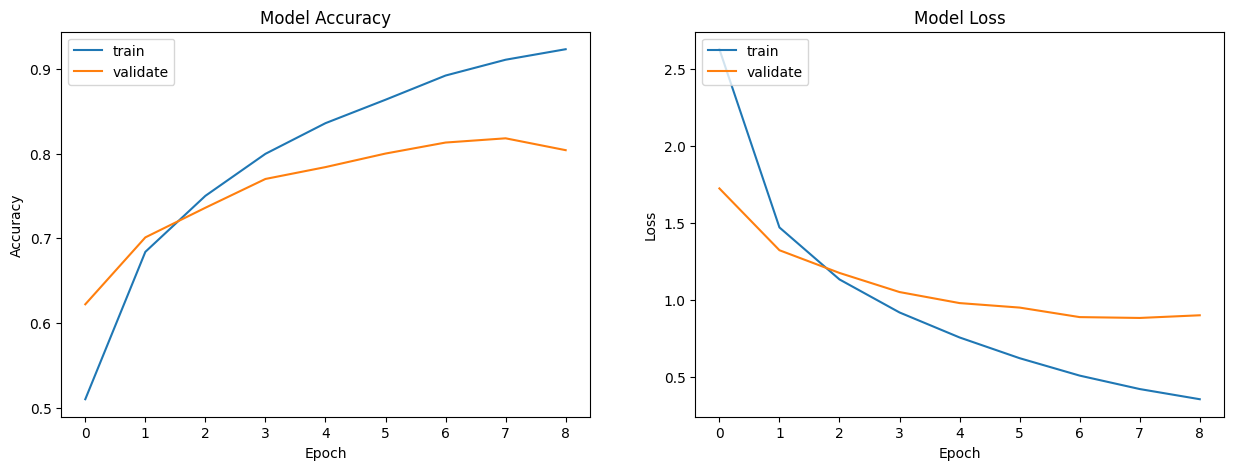

In [23]:
import matplotlib.pyplot as plt

def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

# Predicción

In [24]:
prediccion = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [28]:
#prediccion2 = prediccion.argmax(axis=-1)
np.sum(prediccion[0])

0.99999994

In [30]:
np.argmax(prediccion[0])

3

In [25]:
#Evaluación

perdida, exactitud = model.evaluate(
    x=x_test,
    y=y_test,
)

71/71 [==============================] - 0s 4ms/step - loss: 0.9569 - accuracy: 0.7885


**Clasificador aleatorio**

In [26]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1861086375779163